# Simulation
## Assignment 3.1 – Common random numbers
#### Ari Viitala 432568

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
def system(lambda_c, mu_1, mu_2, seed):
    #creating a random number generator which is seeded with the seed given as an argument 
    seeder = np.random
    seeder.seed(seed)
    #creating the random number streams for all different processes
    rand_customers = np.random
    rand_server1 = np.random
    rand_server2 = np.random 
    rand_switch = np.random
    #seeding the random number streams with the seeder random number generator
    rand_customers.seed(seeder.randint(1,1000000))
    rand_server1.seed(seeder.randint(1,1000000))
    rand_server2.seed(seeder.randint(1,1000000))
    rand_switch.seed(seeder.randint(1,1000000))
    #the basic simulation variables like in every queue simulation
    t = 0
    n_out = 0
    customer = rand_customers.exponential(lambda_c)
    server1 = 10000000
    server2 = 10000000
    status1 = 0
    status2 = 0
    que1 = 0
    que2 = 0
    #total queuing time that is returned after the simulation
    que_t = 0
    
    while n_out < 100:
        #when a new customer arrives we update the queuetime    
        if customer < min(server1, server2):
            #update queue time 
            que_t += (customer - t) * (que1 + que2)
            #update simulation clock
            t = customer
            #the horrible if-else mess that decides what to do based on que lengths server statuses
            if que1 + status1 < que2 + status2:
                #if server is empty
                if status1 == 0:
                    server1 = t + rand_server1.exponential(mu_1)
                    status1 = 1
                else:
                    que1 += 1
            elif que2 + status2 < que1 + status1:
                if status2 == 0:
                    server2 = t + rand_server2.exponential(mu_2)
                    status2 = 1
                else:
                    que2 += 1
            #if queues are equal length
            elif rand_switch.random() < 0.5:
                if status1 == 0:
                    server1 = t + rand_server1.exponential(mu_1)
                    status1 = 1
                else:
                    que1 += 1
            else:
                if status2 == 0:
                    server2 = t + rand_server2.exponential(mu_2)
                    status2 = 1
                else:
                    que2 += 1
            #creating a new customer 
            customer = t + rand_customers.exponential(lambda_c)
        else:
            #see which server is ready
            ready = min(server1, server2)
            #update queue time
            que_t += (ready - t) * (que1 + que2)
            n_out += 1
            #update simulation clock
            t = ready
            #take a customer into a server from que or make the server empty
            if server1 < server2:
                if que1 == 0:
                    status1 = 0
                    server1 = 100000000
                else:
                    que1 -= 1
                    server1 = t + np.random.exponential(mu_1)
            elif que2 == 0:
                status2 = 0
                server2 = 100000000
            else:
                que2 -= 1
                server2 = t + np.random.exponential(mu_2)
    #return the total queuing time before the 100th customer leavest the system
    return que_t

#### The simulation does not take into account if there are people queuing while the 100th customer is being served and the time that 100th customer spends in the server is inclued also. However this is the same for all simulations and the effect should be small. Also here we consider the total queuing time. If we wanted the average this could be just divided by 100.

### Running the simulation

In [42]:
#vectors to store the simulation results
times1 = []
times2 = []
CRN_times1 = []
CRN_times2 = []
#the generator for seeding different runs of the simulations
s = np.random
hi = 1000000
lo = 1
#simulationg 100 different iterations with independent random numbers and common random numbers
for i in range(0,100):
    seed = s.randint(lo, hi)
    #independent simulations
    times1.append(system(1, 0.6, 0.6, s.randint(lo,hi)))
    times2.append(system(1, 0.3, 0.9, s.randint(lo,hi)))
    #CRN simulations 
    CRN_times1.append(system(1, 0.6, 0.6, seed))
    CRN_times2.append(system(1, 0.3, 0.9, seed))    

In [43]:
#taking the difference between different server speeds 
diff = np.array(times1) - np.array(times2)
CRN_diff = np.array(CRN_times1) - np.array(CRN_times2)
#calculating mean and standard deviation between the simulations with different server speeds
print("Mean with independent random numbers: " + str(np.mean(diff)))
print("Standard deviation with independent random numbers: " + str(np.std(diff)))
print("Mean with CRN: " + str(np.mean(CRN_diff)))
print("Standard deviation with CRN: " + str(np.std(CRN_diff)))

Mean with independent random numbers: 3.32969341488
Standard deviation with independent random numbers: 6.82623027441
Mean with CRN: 3.25855251769
Standard deviation with CRN: 4.5040829061


#### We see that with common random numbers the standard deviation between the iterations is somewhat decreased. The mean is about the same between the cases. It seems that the configuration with $\mu_1 = 0.3$ and $\mu_2 = 0.9$ is a bit faster since the mean is positive in both cases. 

### Plotting histograms to visualize the distributions of the results

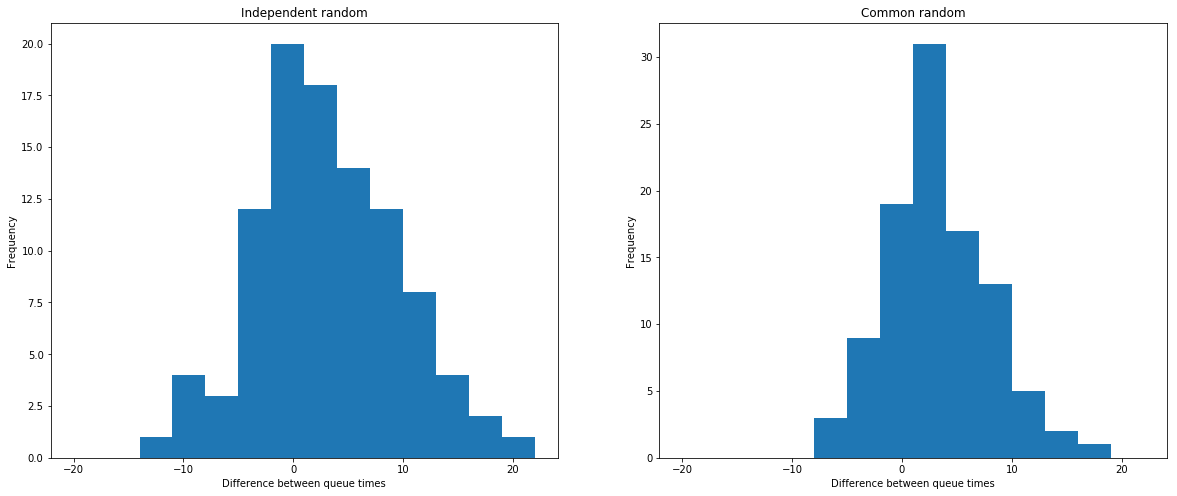

In [44]:
plt.figure(1, (20, 8))
plt.subplot(121)
plt.hist(diff, bins = list(range(-20,24, 3)))
plt.xlabel("Difference between queue times")
plt.ylabel("Frequency")
plt.title("Independent random")
plt.subplot(122)
plt.hist(CRN_diff, bins = list(range(-20,24, 3)))
plt.xlabel("Difference between queue times")
plt.ylabel("Frequency")
plt.title("Common random")
plt.show()

#### The histogram of the queue time differences reveals that with the common random numbers the histogram has a much higher peak. This means that there is more mass around the center so the deviation is smaller. This means that by using common random numbers between simulations we can decrease the standard deviation withing simulation runs without increasing the amount of iterations.